In [7]:
from tiffConverter import convert_to_numpy, convert_to_tiff
import matplotlib.pyplot as plt
import skimage as sk

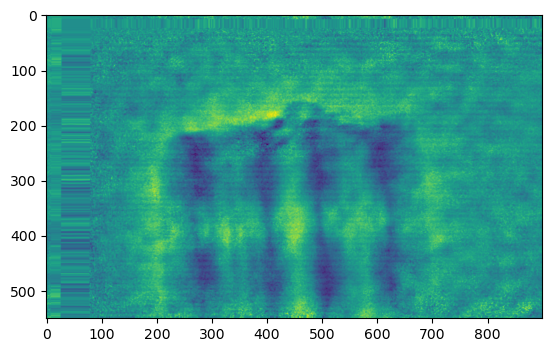

In [25]:
# prealigned_tif_file = "alignedProjections/aligned_iterateVMF_sirt_20240905-133258.tif"
prealigned_tif_file = "alignedProjections/aligned_iterateVMF_optFlow_sirt_20240905-223101.tif"

obj, scale_info = convert_to_numpy(prealigned_tif_file)
image = obj[35]
image = image / np.max(image)
# tomo = tomoDataClass.tomoData(obj)
# tomo.center_projections()
plt.imshow(image)
plt.show()

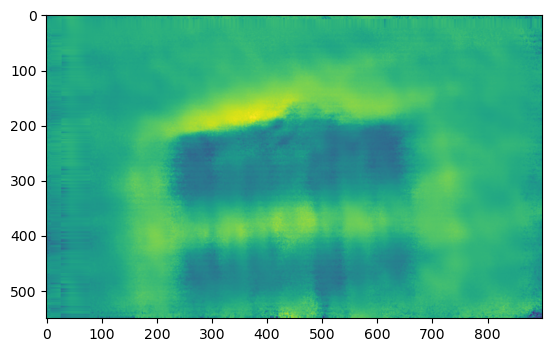

In [26]:
newImg = sk.restoration.denoise_bilateral(image, sigma_spatial = 15)
plt.imshow(newImg)
plt.show()

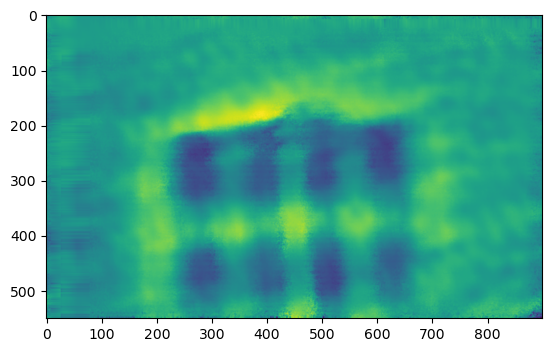

In [27]:
newImg = sk.restoration.denoise_bilateral(image, sigma_spatial = 10)
plt.imshow(newImg)
plt.show()

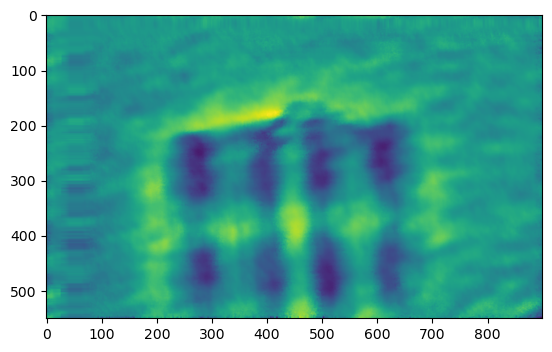

In [28]:
newImg = sk.restoration.denoise_bilateral(image, sigma_spatial = 5)
plt.imshow(newImg)
plt.show()

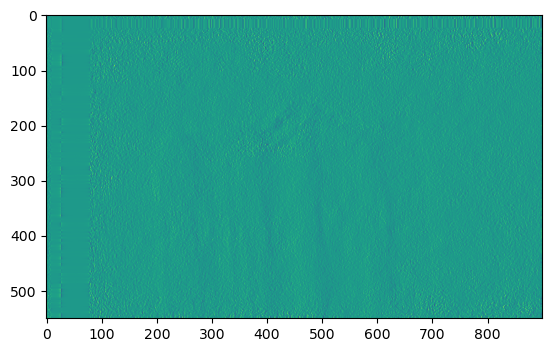

In [29]:
import numpy as np

def ramp_filter(n):
    if n == 0:
        return 1 / 4
    elif n % 2 == 0:
        return 0
    else:
        return -1 / (n * n * np.pi * np.pi)
    
import numpy as np
from scipy.fftpack import fft, ifft

def apply_ram_lak_filter(sinogram):
    filtered_sinogram = np.zeros_like(sinogram)
    for i in range(sinogram.shape[0]):
        projection = sinogram[i, :]
        projection_fft = fft(projection)
        ramp_filter_freq = np.abs(np.fft.fftfreq(projection.size))
        filtered_projection_fft = projection_fft * ramp_filter_freq
        filtered_projection = ifft(filtered_projection_fft)
        filtered_sinogram[i, :] = filtered_projection.real
    return filtered_sinogram

# Example usage
sinogram = image / np.max(image)  # Your sinogram data
filtered_sinogram = apply_ram_lak_filter(sinogram)

plt.imshow(filtered_sinogram)
plt.show()

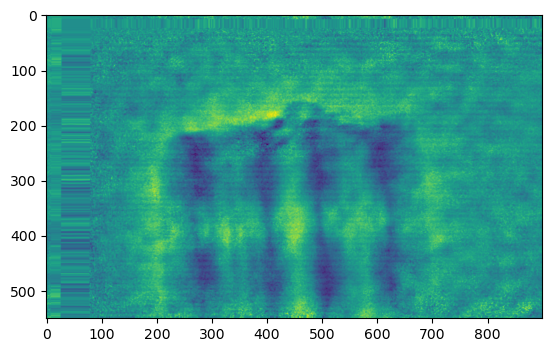

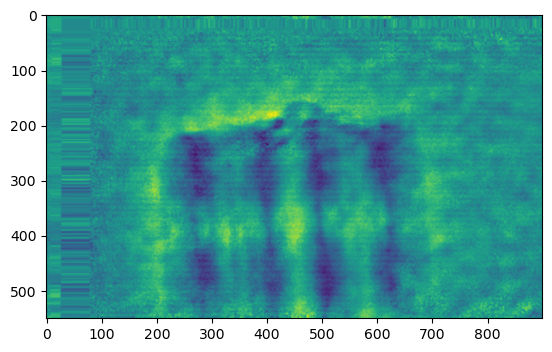

In [31]:
from skimage.filters import median
import cv2

plt.imshow(image)
plt.show()
filtered_img = median(image) 
plt.imshow(filtered_img)
plt.show()

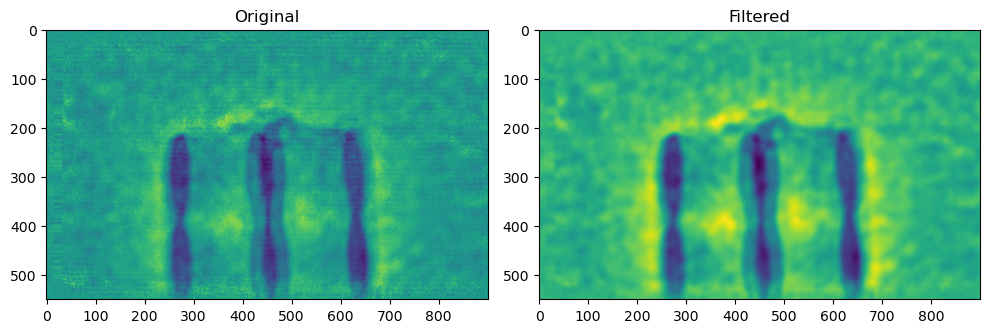

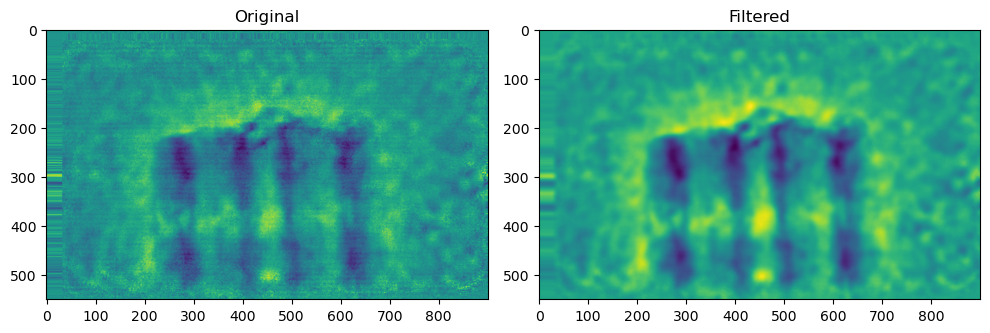

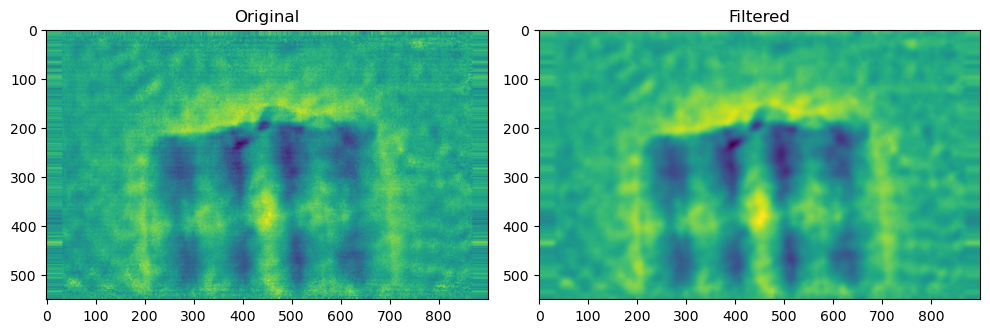

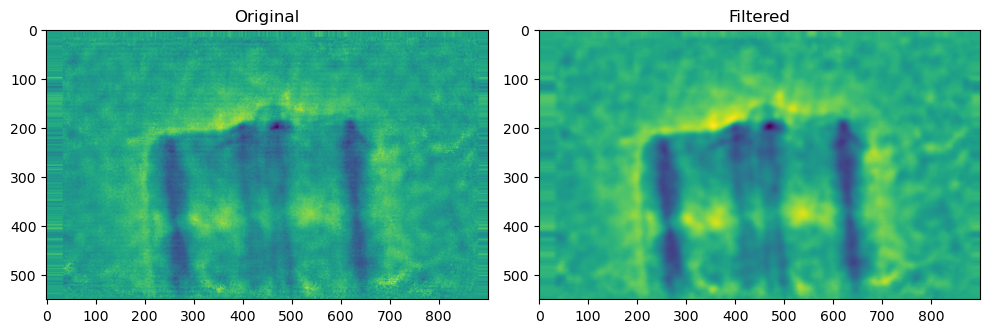

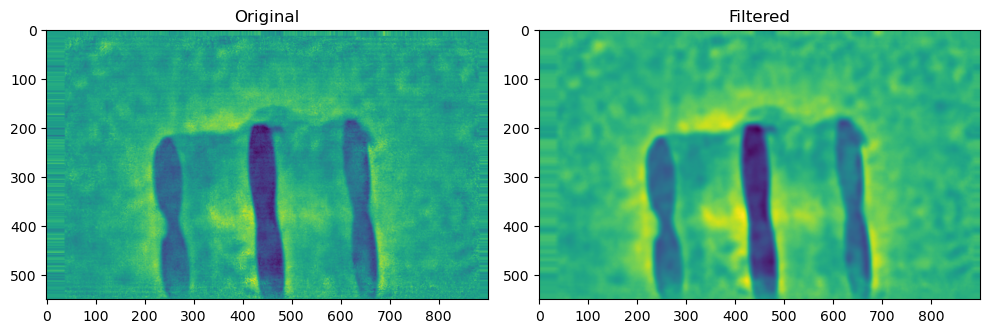

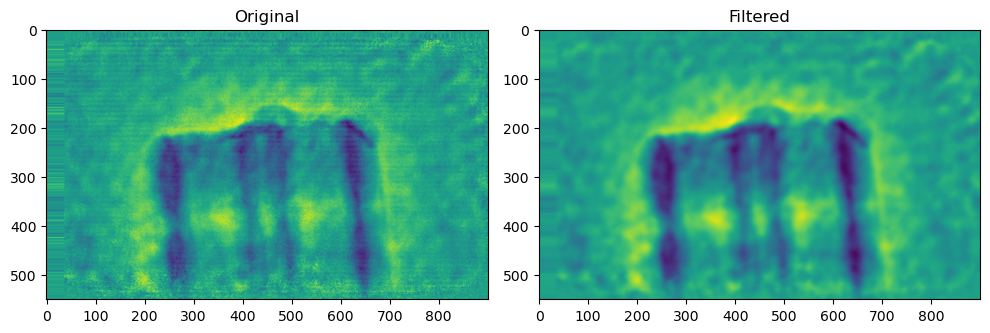

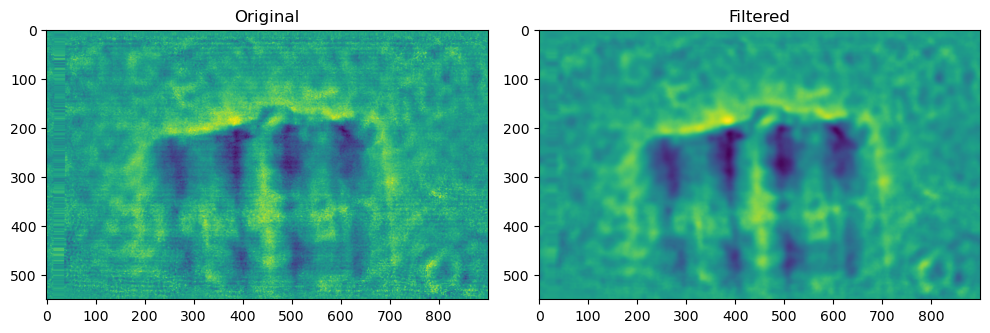

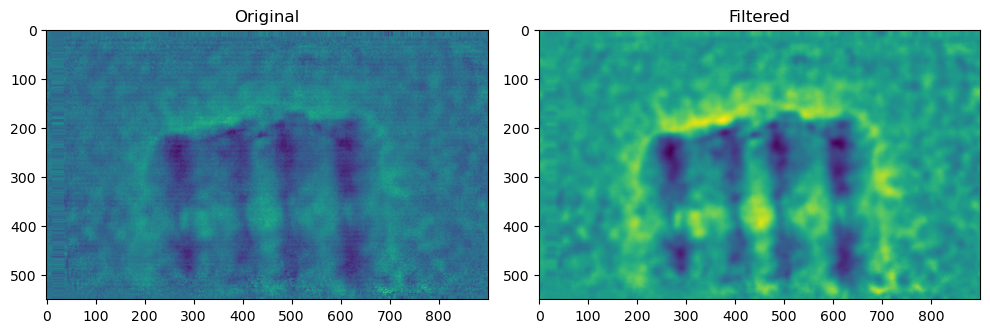

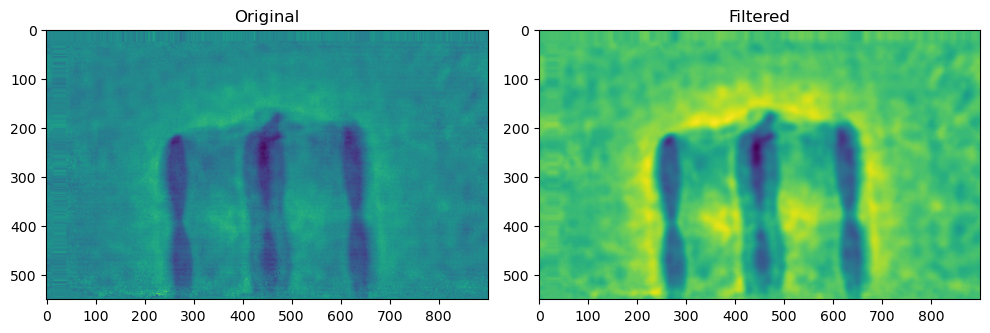

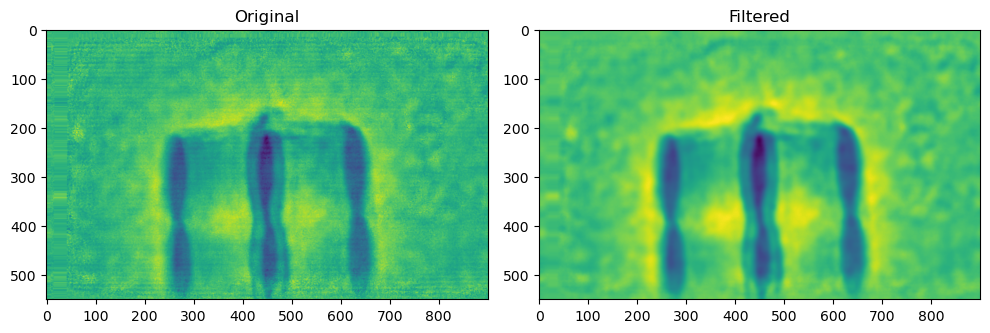

In [46]:
import cv2

prealigned_tif_file = "alignedProjections/aligned_iterateVMF_optFlow_sirt_20240905-223101.tif"

obj, scale_info = convert_to_numpy(prealigned_tif_file)

for i in range(10):
    image = obj[i*30]

    # Display the original and filtered images side by side
    plt.figure(figsize=(10, 5))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original")

    # Filtered image
    filtered_img = cv2.bilateralFilter(image, d=15, sigmaColor=0.3, sigmaSpace=100)
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_img)
    plt.title("Filtered")

    # Show the plot
    plt.tight_layout()
    plt.show()